# Max and Min Temperatures Data Visualization 

$\textbf{Task:}$ Visualize data for high and low temperatures in Ann Arbor, Michigan over a 10 year span(2005-2014) and find record highs and lows for 2015.

In [5]:
import pandas as pd
import numpy as np

# Reads the csv file
NOAA_data= pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Converts the temp from tenths of degrees C to degrees C 
NOAA_data['Data_Value']=NOAA_data['Data_Value']/10

# Splits the date into two new columns, Year and Month/Day
NOAA_data['Year']=NOAA_data['Date'].str[:4]
NOAA_data['Month/Day']=NOAA_data['Date'].str[5:]

# Splits the data into 2005-2014 and 2015 data
ten_year_data=NOAA_data[NOAA_data['Year']!='2015'].copy()
data_2015=NOAA_data[NOAA_data['Year']=='2015'].copy()

# Creates dataframes of maximum and then minimum temperatures for the ten year data
max_temps=ten_year_data[ten_year_data['Element']=='TMAX']
min_temps=ten_year_data[ten_year_data['Element']=='TMIN']

# Finds the max temperature for each day of the year and then excludes leap days
max_temps=max_temps.groupby(by=['Month/Day']).agg({'Data_Value':np.max})
max_temps=max_temps.drop('02-29')

# Finds the min temperature for each day of the year and then excludes leap days
min_temps=min_temps.groupby(by=['Month/Day']).agg({'Data_Value':np.min})
min_temps=min_temps.drop('02-29')

# Creates dataframes of maximum and then minimum temperatures for the 2015 data
max_temps_2015=data_2015[data_2015['Element']=='TMAX']
min_temps_2015=data_2015[data_2015['Element']=='TMIN']

# Finds the max temperature for each day of the year for 2015 
max_temps_2015=max_temps_2015.groupby(by=['Month/Day']).agg({'Data_Value':np.max})

# Finds the max temperature for each day of the year for 2015 
min_temps_2015=min_temps_2015.groupby(by=['Month/Day']).agg({'Data_Value':np.min})

# Finds which 2015 temperatures are a record low
record_low_index=np.where(min_temps_2015['Data_Value']<min_temps['Data_Value'])
record_low=min_temps_2015.iloc[record_low_index]

# Finds which 2015 temperatures are a record high
record_high_index=np.where(max_temps_2015['Data_Value']>max_temps['Data_Value'])
record_high=max_temps_2015.iloc[record_high_index]

<IPython.core.display.Javascript object>


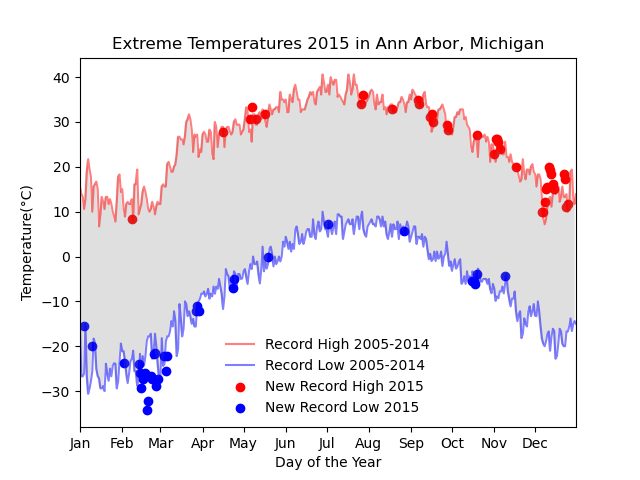

In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt

# Sets length of x axis for days of the year
x_axis=np.arange(1,366)
plt.xlim([1, 365])

min_data=min_temps['Data_Value']
max_data=max_temps['Data_Value']

# Line plots of record highs and lows for 2005-2014
plt.plot(x_axis, max_data, color='red', alpha=0.5)
plt.plot(x_axis, min_data, color='blue', alpha=0.5)

# Scatter plots of new record highs and lows with 2015 data
plt.scatter(record_high_index, record_high, color='red')
plt.scatter(record_low_index,record_low, color='blue')

# Creates a legend
plt.legend(['Record High 2005-2014','Record Low 2005-2014','New Record High 2015','New Record Low 2015'],frameon=False)

# Fills the space between the lines
plt.gca().fill_between(range(len(x_axis)), 
                       min_data, max_data, 
                       facecolor='grey', 
                       alpha=0.25)
# Sets tick location and name
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], 
          ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Labels
plt.xlabel('Day of the Year')
plt.ylabel('Temperature(°C)') 
plt.title('Extreme Temperatures 2015 in Ann Arbor, Michigan')
plt.show()